# Assignment_02
 
- The task can be divided into three parts: 
    - identify the main drivers of the quality measures in the AWJ cutting process performed in the company
    - Support your answer by suitable visualizations of the provided data and quantitative statistical measures
    - provide and explain ideas for future improvements of the process

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# A. Overview

In [2]:
#import required packages here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML/Python Scripts/Assignment_02/waterjet_data.csv')


In [4]:
df.shape

(236549, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236549 entries, 0 to 236548
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   prod_day           236549 non-null  int64  
 1   part_type          236549 non-null  object 
 2   material           233149 non-null  object 
 3   part_number        236549 non-null  object 
 4   nozzle_diameter    236549 non-null  float64
 5   thickness          228627 non-null  float64
 6   standoff_distance  236549 non-null  float64
 7   traverse_speed     236549 non-null  float64
 8   kerf               232151 non-null  float64
 9   Ra                 234180 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 18.0+ MB


In [6]:
df.isnull().sum()

prod_day                0
part_type               0
material             3400
part_number             0
nozzle_diameter         0
thickness            7922
standoff_distance       0
traverse_speed          0
kerf                 4398
Ra                   2369
dtype: int64

In [7]:
# split the dataset into subgroups based on non-numerical information 
dfs = df.groupby('part_type')
dfs2 = df.groupby(['part_type', 'part_number','material'])

# export the description of the splitted database to excel file
dfs2.describe().to_excel('dfs2.xlsx')

# B. Data cleaning 

## I. Deal with incorrect material names

In [8]:
# get indices of cells with incorrect material names
invalid_MTL1_index = df.loc[df.loc[:, 'material'] == 'MTL_1'].index
invalid_MTL2_index = df.loc[df.loc[:, 'material'] == 'MTL_2'].index
# replace them with the correct names
df.loc[invalid_MTL1_index, 'material'] = 'MTL1'
df.loc[invalid_MTL2_index, 'material'] = 'MTL2'

## II. Deal with missing material data

In [9]:
# split the adjusted dataset into subgroups based on non-numerical information 
dfs3 = df.groupby(['part_type', 'part_number','material'])
dfs3.describe().to_excel('dfs3.xlsx')

In [10]:
# create new dataframes for each subgroup based on part_type
df_A = dfs.get_group('A')
df_B = dfs.get_group('B')
df_C = dfs.get_group('C')

# within each subgroup based on part_type, split them into subgroups based on part_number
dfs_A = df_A.groupby('part_number') 
dfs_B = df_B.groupby('part_number') 
dfs_C = df_C.groupby('part_number')


# create dataframes for each part_number
df_A_01 = dfs_A.get_group('P0101')
df_A_02 = dfs_A.get_group('P0102')

df_B_01 = dfs_B.get_group('P0201')
df_B_02 = dfs_B.get_group('P0202')

df_C_01 = dfs_C.get_group('P0301')
df_C_02 = dfs_C.get_group('P0302')

In [11]:
# get indices of missing material data in MTL1 groups
MTL1_A_index = df_A_01.loc[df_A_01.loc[:,'material'].isnull()].index
MTL1_B_index = df_B_01.loc[df_B_01.loc[:,'material'].isnull()].index
MTL1_C_index = df_C_01.loc[df_C_01.loc[:,'material'].isnull()].index

# get indices of missing material data in MTL2 groups
MTL2_A_index = df_A_02.loc[df_A_02.loc[:,'material'].isnull()].index
MTL2_B_index = df_B_02.loc[df_B_02.loc[:,'material'].isnull()].index
MTL2_C_index = df_C_02.loc[df_C_02.loc[:,'material'].isnull()].index


In [12]:
# fill missing values with the material corresponding to part_number
df.loc[MTL1_A_index,'material'] = 'MTL1'
df.loc[MTL1_B_index,'material'] = 'MTL1'
df.loc[MTL1_C_index,'material'] = 'MTL1'

df.loc[MTL2_A_index,'material'] = 'MTL1'
df.loc[MTL2_B_index,'material'] = 'MTL1'
df.loc[MTL2_C_index,'material'] = 'MTL1'

In [13]:
# check to see whether the missing material data is filled
df.isnull().sum()

prod_day                0
part_type               0
material                0
part_number             0
nozzle_diameter         0
thickness            7922
standoff_distance       0
traverse_speed          0
kerf                 4398
Ra                   2369
dtype: int64

## III. Deal with missing thickness data

In [14]:
# get indices of missing thickness data in MTL1 groups
thickness_A_01_index = df_A_01.loc[df_A_01.loc[:,'thickness'].isnull()].index
thickness_B_01_index = df_B_01.loc[df_B_01.loc[:,'thickness'].isnull()].index
thickness_C_01_index = df_C_01.loc[df_C_01.loc[:,'thickness'].isnull()].index

# get indices of missing thickness data in MTL2 groups
thickness_A_02_index = df_A_02.loc[df_A_02.loc[:,'thickness'].isnull()].index
thickness_B_02_index = df_B_02.loc[df_B_02.loc[:,'thickness'].isnull()].index
thickness_C_02_index = df_C_02.loc[df_C_02.loc[:,'thickness'].isnull()].index

In [15]:
# fill missing values with the thickness corresponding to the material
df.loc[thickness_A_01_index,'thickness'] = 0.9
df.loc[thickness_B_01_index,'thickness'] = 0.9
df.loc[thickness_C_01_index,'thickness'] = 0.9

df.loc[thickness_A_02_index,'thickness'] = 1.25
df.loc[thickness_B_02_index,'thickness'] = 1.25
df.loc[thickness_C_02_index,'thickness'] = 1.25

In [16]:
# check to see whether the missing thickness data is filled
df.isnull().sum()

prod_day                0
part_type               0
material                0
part_number             0
nozzle_diameter         0
thickness               0
standoff_distance       0
traverse_speed          0
kerf                 4398
Ra                   2369
dtype: int64

## IV. Deal with missing kerf and Ra data
- Their values do depend on which sub-group they are in.

#### 1) kerf data

In [17]:
# Average kerf value in each subgroup:  
avg_kerf_A01 = df_A_01.loc[:, 'kerf'].mean()
avg_kerf_A02 = df_A_02.loc[:, 'kerf'].mean()

avg_kerf_B01 = df_B_01.loc[:, 'kerf'].mean()
avg_kerf_B02 = df_B_02.loc[:, 'kerf'].mean()

avg_kerf_C01 = df_C_01.loc[:, 'kerf'].mean()
avg_kerf_C02 = df_C_02.loc[:, 'kerf'].mean()

# Average Ra value in each subgroup:  
avg_Ra_A01 = df_A_01.loc[:, 'Ra'].mean()
avg_Ra_A02 = df_A_02.loc[:, 'Ra'].mean()

avg_Ra_B01 = df_B_01.loc[:, 'Ra'].mean()
avg_Ra_B02 = df_B_02.loc[:, 'Ra'].mean()

avg_Ra_C01 = df_C_01.loc[:, 'Ra'].mean()
avg_Ra_C02 = df_C_02.loc[:, 'Ra'].mean()

In [18]:
# get indices of missing kerf data in each subgroup:
kerf_A_01_index = df_A_01.loc[df_A_01.loc[:,'kerf'].isnull()].index
kerf_A_02_index = df_A_02.loc[df_A_02.loc[:,'kerf'].isnull()].index

kerf_B_01_index = df_B_01.loc[df_B_01.loc[:,'kerf'].isnull()].index
kerf_B_02_index = df_B_02.loc[df_B_02.loc[:,'kerf'].isnull()].index

kerf_C_01_index = df_C_01.loc[df_C_01.loc[:,'kerf'].isnull()].index
kerf_C_02_index = df_C_02.loc[df_C_02.loc[:,'kerf'].isnull()].index

In [19]:
# fill missing kerf values:
df.loc[kerf_A_01_index,'kerf'] = avg_kerf_A01
df.loc[kerf_A_02_index,'kerf'] = avg_kerf_A02

df.loc[kerf_B_01_index,'kerf'] = avg_kerf_B01
df.loc[kerf_B_02_index,'kerf'] = avg_kerf_B02

df.loc[kerf_C_01_index,'kerf'] = avg_kerf_C01
df.loc[kerf_C_02_index,'kerf'] = avg_kerf_C02

#### 2) Ra data

In [24]:
# get indices of missing Ra data in each subgroup:
Ra_A_01_index = df_A_01.loc[df_A_01.loc[:,'Ra'].isnull()].index
Ra_A_02_index = df_A_02.loc[df_A_02.loc[:,'Ra'].isnull()].index

Ra_B_01_index = df_B_01.loc[df_B_01.loc[:,'Ra'].isnull()].index
Ra_B_02_index = df_B_02.loc[df_B_02.loc[:,'Ra'].isnull()].index

Ra_C_01_index = df_C_01.loc[df_C_01.loc[:,'Ra'].isnull()].index
Ra_C_02_index = df_C_02.loc[df_C_02.loc[:,'Ra'].isnull()].index

In [25]:
# fill missing Ra values:
df.loc[Ra_A_01_index,'Ra'] = avg_Ra_A01
df.loc[Ra_A_02_index,'Ra'] = avg_Ra_A02

df.loc[Ra_B_01_index,'Ra'] = avg_Ra_B01
df.loc[Ra_B_02_index,'Ra'] = avg_Ra_B02

df.loc[Ra_C_01_index,'Ra'] = avg_Ra_C01
df.loc[Ra_C_02_index,'Ra'] = avg_Ra_C02

In [26]:
# check to see whether all the missing data is filled
df.isnull().sum()

prod_day             0
part_type            0
material             0
part_number          0
nozzle_diameter      0
thickness            0
standoff_distance    0
traverse_speed       0
kerf                 0
Ra                   0
dtype: int64

In [27]:
# recreate subgroups from the clean data:

dfs = df.groupby('part_type')
# create new dataframes for each subgroup based on part_type
df_A = dfs.get_group('A')
df_B = dfs.get_group('B')
df_C = dfs.get_group('C')

# within each subgroup based on part_type, split them into subgroups based on part_number
dfs_A = df_A.groupby('part_number') 
dfs_B = df_B.groupby('part_number') 
dfs_C = df_C.groupby('part_number')


# create dataframes for each part_number
df_A_01 = dfs_A.get_group('P0101')
df_A_02 = dfs_A.get_group('P0102')

df_B_01 = dfs_B.get_group('P0201')
df_B_02 = dfs_B.get_group('P0202')

df_C_01 = dfs_C.get_group('P0301')
df_C_02 = dfs_C.get_group('P0302')

## V. Visual inspection of outliers

#### 1) Boxplots for kerf and Ra, grouped by part_number (a combination of part_type and material)

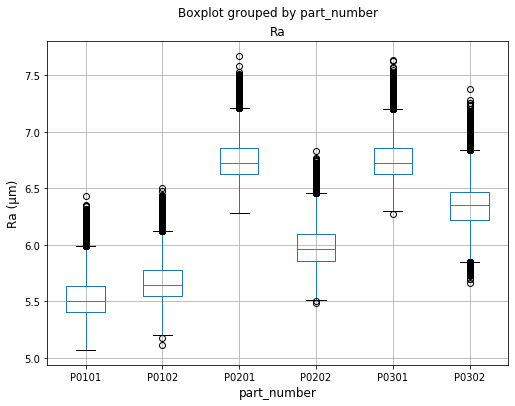

In [ ]:
# create a box plot for Ra values in each of the 6 subgroups
fig, ax = plt.subplots()
df.boxplot(by ='part_number', column ='Ra', ax=ax, grid = True) 

fig.set_figwidth(8)
fig.set_figheight(6)


ax.set_xlabel('part_number', fontsize=12, color='black')
ax.set_ylabel('Ra (µm)', fontsize=12, color='black')

fig.savefig('Boxplot of Ra.png')

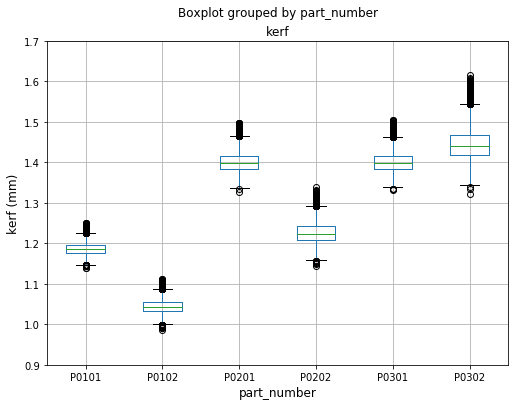

In [ ]:
# create a box plot for kerf values in each of the 6 subgroups
fig, ax = plt.subplots()
df.boxplot(by ='part_number', column ='kerf', ax=ax, grid = True) 
ax.set_ylim(0.9, 1.7)

fig.set_figwidth(8)
fig.set_figheight(6)


ax.set_xlabel('part_number', fontsize=12, color='black')
ax.set_ylabel('kerf (mm)', fontsize=12, color='black')

fig.savefig('Boxplot of kerf.png')

#### 2) Detecting outliers in the multidimensional space

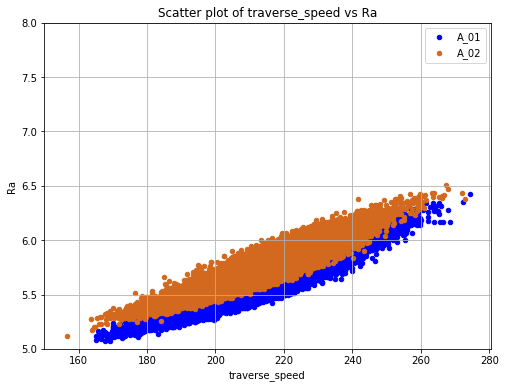

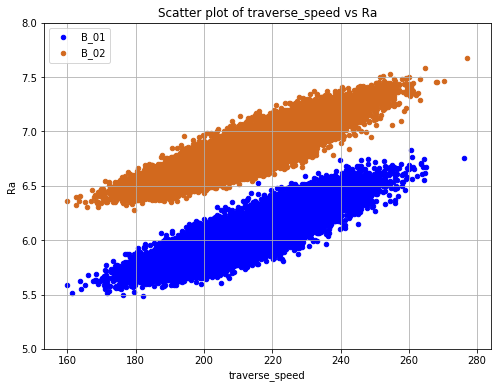

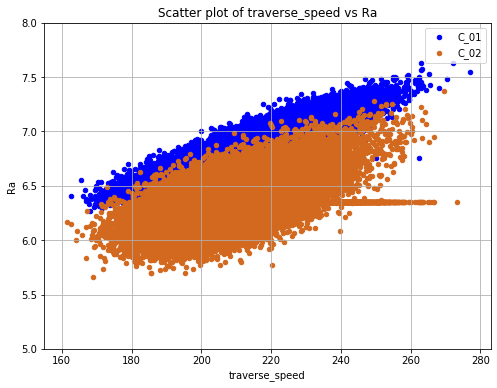

In [ ]:
## Create scatter plots of traverse_speed and kerf
# part A (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0101').plot.scatter(x='traverse_speed', y='Ra', ax=ax, color='blue')
df.groupby('part_number').get_group('P0102').plot.scatter(x='traverse_speed', y='Ra', ax=ax, color='chocolate')

ax.legend(['A_01', 'A_02'])
ax.set_title('Scatter plot of traverse_speed vs Ra')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(5.0, 8.0)
fig.savefig('Scatter plot of traverse_speed vs Ra (material A).png')
######################################
# part B (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0202').plot.scatter(x='traverse_speed', y='Ra', ax=ax, color='blue')
df.groupby('part_number').get_group('P0201').plot.scatter(x='traverse_speed', y='Ra', ax=ax, color='chocolate')

ax.legend(['B_01', 'B_02'])
ax.set_title('Scatter plot of traverse_speed vs Ra')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(5.0, 8.0)
fig.savefig('Scatter plot of traverse_speed vs Ra (material B).png')
######################################
# part C (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0301').plot.scatter(x='traverse_speed', y='Ra', ax=ax, color='blue')
df.groupby('part_number').get_group('P0302').plot.scatter(x='traverse_speed', y='Ra', ax=ax, color='chocolate')

ax.legend(['C_01', 'C_02'])
ax.set_title('Scatter plot of traverse_speed vs Ra')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(5.0, 8.0)
fig.savefig('Scatter plot of traverse_speed vs Ra (material C).png')

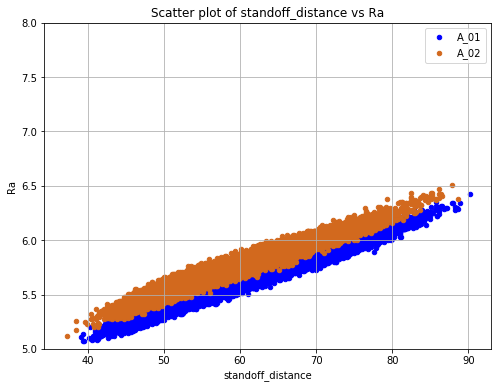

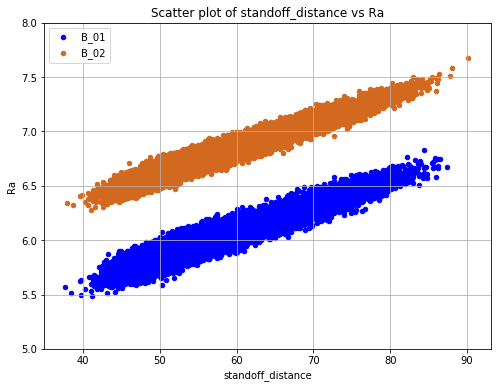

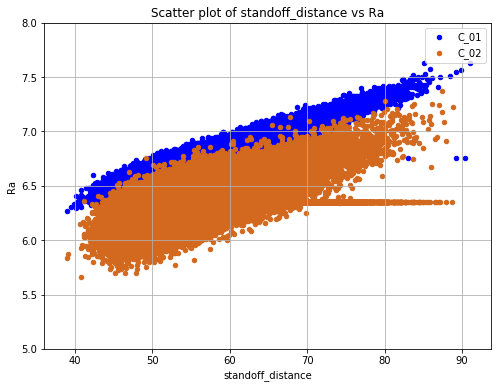

In [ ]:
## Create scatter plots of standoff_distance and Ra
# part A (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0101').plot.scatter(x='standoff_distance', y='Ra', ax=ax, color='blue')
df.groupby('part_number').get_group('P0102').plot.scatter(x='standoff_distance', y='Ra', ax=ax, color='chocolate')

ax.legend(['A_01', 'A_02'])
ax.set_title('Scatter plot of standoff_distance vs Ra')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(5.0, 8.0)
fig.savefig('Scatter plot of standoff_distance vs Ra (material A).png')
######################################
# part B (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0202').plot.scatter(x='standoff_distance', y='Ra', ax=ax, color='blue')
df.groupby('part_number').get_group('P0201').plot.scatter(x='standoff_distance', y='Ra', ax=ax, color='chocolate')

ax.legend(['B_01', 'B_02'])
ax.set_title('Scatter plot of standoff_distance vs Ra')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(5.0, 8.0)
fig.savefig('Scatter plot of standoff_distance vs Ra (material B).png')
######################################
# part C (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0301').plot.scatter(x='standoff_distance', y='Ra', ax=ax, color='blue')
df.groupby('part_number').get_group('P0302').plot.scatter(x='standoff_distance', y='Ra', ax=ax, color='chocolate')

ax.legend(['C_01', 'C_02'])
ax.set_title('Scatter plot of standoff_distance vs Ra')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(5.0, 8.0)
fig.savefig('Scatter plot of standoff_distance vs Ra (material C).png')

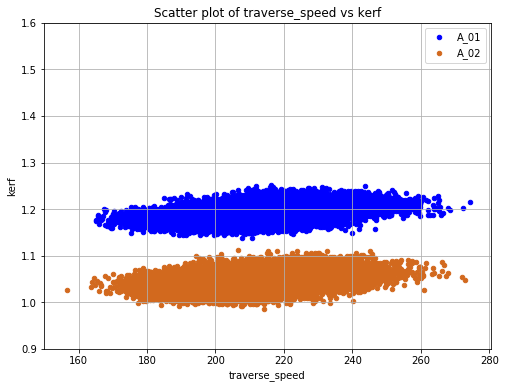

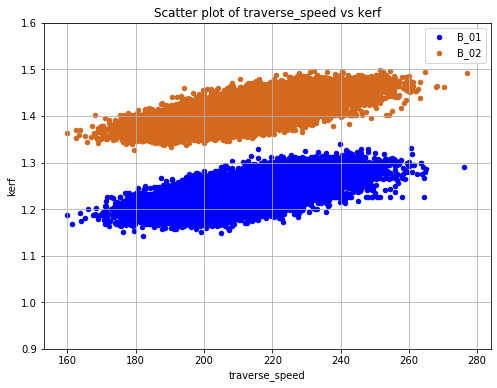

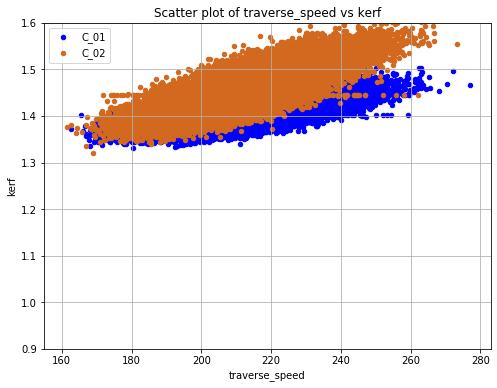

In [ ]:
## Create scatter plots of traverse_speed and kerf
# part A (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0101').plot.scatter(x='traverse_speed', y='kerf', ax=ax, color='blue')
df.groupby('part_number').get_group('P0102').plot.scatter(x='traverse_speed', y='kerf', ax=ax, color='chocolate')

ax.legend(['A_01', 'A_02'])
ax.set_title('Scatter plot of traverse_speed vs kerf')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(0.9, 1.6)
fig.savefig('Scatter plot of traverse_speed vs kerf (material A).png')
######################################
# part B (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0202').plot.scatter(x='traverse_speed', y='kerf', ax=ax, color='blue')
df.groupby('part_number').get_group('P0201').plot.scatter(x='traverse_speed', y='kerf', ax=ax, color='chocolate')

ax.legend(['B_01', 'B_02'])
ax.set_title('Scatter plot of traverse_speed vs kerf')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(0.9, 1.6)
fig.savefig('Scatter plot of traverse_speed vs kerf (material B).png')
######################################
# part C (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0301').plot.scatter(x='traverse_speed', y='kerf', ax=ax, color='blue')
df.groupby('part_number').get_group('P0302').plot.scatter(x='traverse_speed', y='kerf', ax=ax, color='chocolate')

ax.legend(['C_01', 'C_02'])
ax.set_title('Scatter plot of traverse_speed vs kerf')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(0.9, 1.6)
fig.savefig('Scatter plot of traverse_speed vs kerf (material C).png')

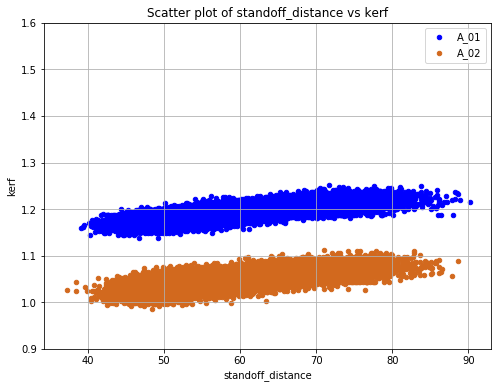

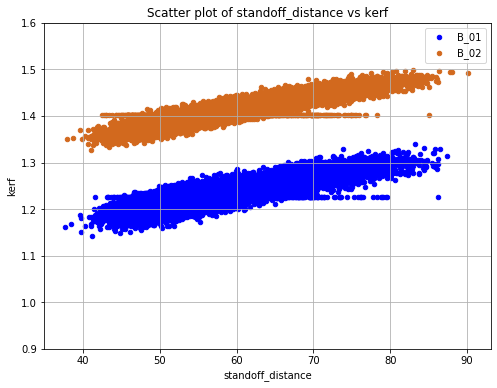

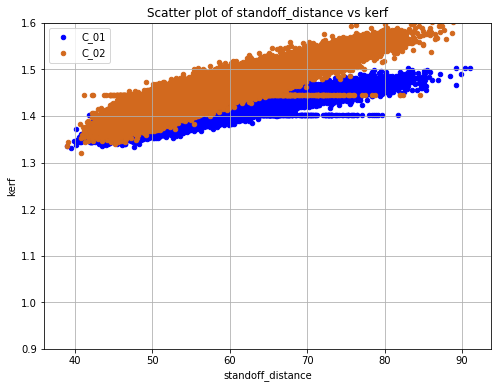

In [ ]:
## Create scatter plots of standoff_distance and kerf
# part A (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0101').plot.scatter(x='standoff_distance', y='kerf', ax=ax, color='blue')
df.groupby('part_number').get_group('P0102').plot.scatter(x='standoff_distance', y='kerf', ax=ax, color='chocolate')

ax.legend(['A_01', 'A_02'])
ax.set_title('Scatter plot of standoff_distance vs kerf')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(0.9, 1.6)
fig.savefig('Scatter plot of standoff_distance vs kerf (material A).png')
######################################
# part B (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0202').plot.scatter(x='standoff_distance', y='kerf', ax=ax, color='blue')
df.groupby('part_number').get_group('P0201').plot.scatter(x='standoff_distance', y='kerf', ax=ax, color='chocolate')

ax.legend(['B_01', 'B_02'])
ax.set_title('Scatter plot of standoff_distance vs kerf')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(0.9, 1.6)
fig.savefig('Scatter plot of standoff_distance vs kerf (material B).png')
######################################
# part C (MTL1 + MTL2)
fig, ax = plt.subplots()

df.groupby('part_number').get_group('P0301').plot.scatter(x='standoff_distance', y='kerf', ax=ax, color='blue')
df.groupby('part_number').get_group('P0302').plot.scatter(x='standoff_distance', y='kerf', ax=ax, color='chocolate')

ax.legend(['C_01', 'C_02'])
ax.set_title('Scatter plot of standoff_distance vs kerf')
ax.grid()

fig.set_figwidth(8)
fig.set_figheight(6)
ax.set_ylim(0.9, 1.6)
fig.savefig('Scatter plot of standoff_distance vs kerf (material C).png')

# B. Identify the main drivers of the quality measures

## I. Data visualization
#### 1. Material

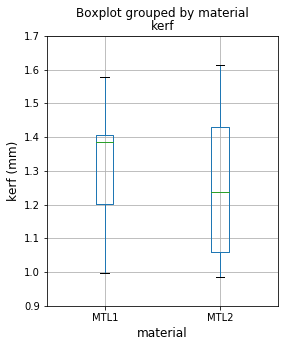

In [ ]:
# create conditional boxplot for kerf values by material
fig, ax = plt.subplots()
df.boxplot(by ='material', column ='kerf', ax=ax, grid = True) 
ax.set_ylim(0.9, 1.7)

fig.set_figwidth(4)
fig.set_figheight(5)

ax.set_xlabel('material', fontsize=12, color='black')
ax.set_ylabel('kerf (mm)', fontsize=12, color='black')

fig.savefig('Boxplot of kerf grouped by material.png')

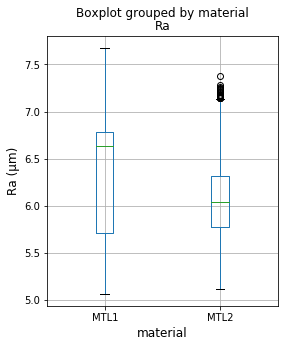

In [ ]:
# create conditional boxplot for Ra values by material
fig, ax = plt.subplots()
df.boxplot(by ='material', column ='Ra', ax=ax, grid = True) 

fig.set_figwidth(4)
fig.set_figheight(5)

ax.set_xlabel('material', fontsize=12, color='black')
ax.set_ylabel('Ra (µm)', fontsize=12, color='black')

fig.savefig('Boxplot of Ra grouped by material.png')

#### 2.	The day of production (prod_day)

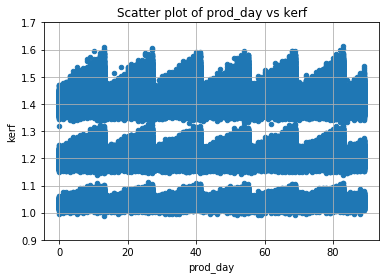

In [ ]:
# Create scatter plot of prod_day and kerf
fig, ax = plt.subplots()

df.plot.scatter(x='prod_day', y='kerf', ax=ax)

ax.set_ylim(0.9, 1.7)
ax.set_title('Scatter plot of prod_day vs kerf')
ax.grid(True)
fig.savefig('Scatter plot of prod_day vs kerf.png')

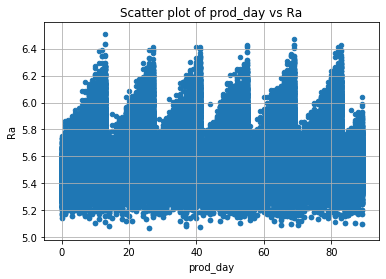

In [ ]:
# Create scatter plot of prod_day and kerf
fig, ax = plt.subplots()

dfs_A.plot.scatter(x='prod_day', y='Ra', ax=ax)

ax.set_title('Scatter plot of prod_day vs Ra')
ax.grid(True)
fig.savefig('Scatter plot of prod_day vs Ra.png')

#### 3.	The diameter of the nozzle (nozzle_diameter)

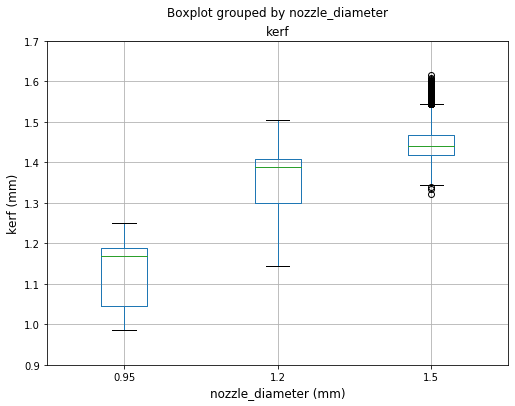

In [ ]:
# create conditional boxplot for kerf values by nozzle_diameter
fig, ax = plt.subplots()
df.boxplot(by ='nozzle_diameter', column ='kerf', ax=ax, grid = True) 
ax.set_ylim(0.9, 1.7)

fig.set_figwidth(8)
fig.set_figheight(6)

ax.set_xlabel('nozzle_diameter (mm)', fontsize=12, color='black')
ax.set_ylabel('kerf (mm)', fontsize=12, color='black')

fig.savefig('Boxplot of kerf grouped by nozzle_diameter.png')

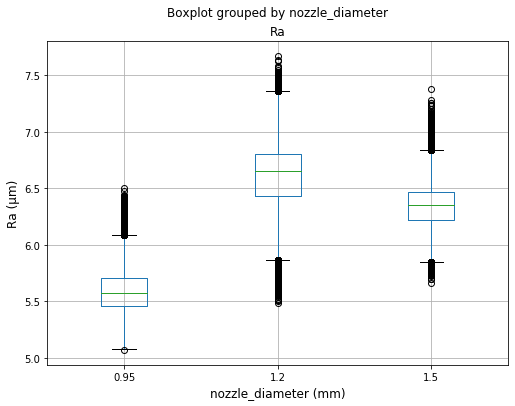

In [ ]:
# create conditional boxplot for Ra values by nozzle_diameter
fig, ax = plt.subplots()
df.boxplot(by ='nozzle_diameter', column ='Ra', ax=ax, grid = True) 
#ax.set_ylim(0.9, 1.7)

fig.set_figwidth(8)
fig.set_figheight(6)

ax.set_xlabel('nozzle_diameter (mm)', fontsize=12, color='black')
ax.set_ylabel('Ra (µm)', fontsize=12, color='black')

fig.savefig('Boxplot of Ra grouped by nozzle_diameter.png')

#### 4.	Thickness

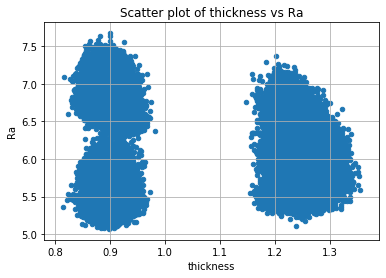

In [ ]:
# Create scatter plot of thickness vs Ra
fig, ax = plt.subplots()

df.plot.scatter(x='thickness', y='Ra', ax=ax)

ax.set_title('Scatter plot of thickness vs Ra')
ax.grid(True)
fig.savefig('Scatter plot of thickness vs Ra.png')

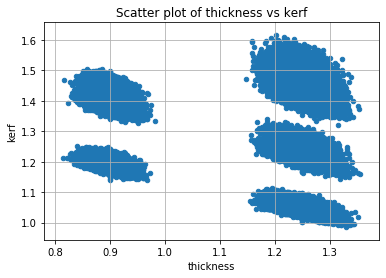

In [ ]:
# Create scatter plot of thickness vs kerf
fig, ax = plt.subplots()

df.plot.scatter(x='thickness', y='kerf', ax=ax)

ax.set_title('Scatter plot of thickness vs kerf')
ax.grid(True)
fig.savefig('Scatter plot of thickness vs kerf.png')

## II. Quantitative statistical measures

In [ ]:
# correlation matrix of the data set
df.corr().round(5)

,prod_day,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra
prod_day,1.00000,0.00174,0.00132,0.02266,0.01936,0.00430,0.00704
nozzle_diameter,0.00174,1.00000,0.32656,0.00079,0.00171,0.80533,0.55471
thickness,0.00132,0.32656,1.00000,-0.00137,-0.00070,-0.27058,-0.33670
standoff_distance,0.02266,0.00079,-0.00137,1.00000,0.83500,0.15452,0.32175
traverse_speed,0.01936,0.00171,-0.00070,0.83500,1.00000,0.12006,0.29713
kerf,0.00430,0.80533,-0.27058,0.15452,0.12006,1.00000,0.83761
Ra,0.00704,0.55471,-0.33670,0.32175,0.29713,0.83761,1.00000


In [ ]:
# correlation matrix of subgroup A_01 (part A, MTL1)
df_A_01.corr().round(5)

,prod_day,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra
prod_day,1.00000,-0.0,-0.00680,0.01733,0.01623,0.01589,0.01734
nozzle_diameter,-0.00000,1.0,0.00000,0.00000,-0.00000,0.00000,0.00000
thickness,-0.00680,0.0,1.00000,-0.00554,-0.01238,-0.46715,0.02942
standoff_distance,0.01733,0.0,-0.00554,1.00000,0.83468,0.77224,0.97617
traverse_speed,0.01623,-0.0,-0.01238,0.83468,1.00000,0.43423,0.93234
kerf,0.01589,0.0,-0.46715,0.77224,0.43423,1.00000,0.65322
Ra,0.01734,0.0,0.02942,0.97617,0.93234,0.65322,1.00000


In [ ]:
# correlation matrix of subgroup A_01 (part A, MTL2)
df_A_02.corr().round(5)

,prod_day,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra
prod_day,1.00000,0.0,-0.00164,0.02557,0.02212,0.01811,0.02517
nozzle_diameter,0.00000,1.0,-0.00000,-0.00000,0.00000,0.00000,0.00000
thickness,-0.00164,-0.0,1.00000,0.00274,0.00351,-0.60662,0.05768
standoff_distance,0.02557,-0.0,0.00274,1.00000,0.83433,0.69117,0.97512
traverse_speed,0.02212,0.0,0.00351,0.83433,1.00000,0.38194,0.93194
kerf,0.01811,0.0,-0.60662,0.69117,0.38194,1.00000,0.56418
Ra,0.02517,0.0,0.05768,0.97512,0.93194,0.56418,1.00000


In [ ]:
# correlation matrix of subgroup A_01 (part B, MTL1)
df_B_01.corr().round(5)

,prod_day,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra
prod_day,1.00000,-0.0,0.00790,0.01826,0.01327,0.01402,0.01569
nozzle_diameter,-0.00000,1.0,-0.00000,0.00000,-0.00000,-0.00000,-0.00000
thickness,0.00790,-0.0,1.00000,-0.00040,-0.00013,-0.34726,-0.20929
standoff_distance,0.01826,0.0,-0.00040,1.00000,0.83568,0.91906,0.96721
traverse_speed,0.01327,-0.0,-0.00013,0.83568,1.00000,0.71883,0.88318
kerf,0.01402,-0.0,-0.34726,0.91906,0.71883,1.00000,0.95264
Ra,0.01569,-0.0,-0.20929,0.96721,0.88318,0.95264,1.00000


In [ ]:
# correlation matrix of subgroup A_01 (part B, MTL2)
df_B_02.corr().round(5)

,prod_day,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra
prod_day,1.00000,-0.0,-0.00701,0.02164,0.02020,0.02181,0.02316
nozzle_diameter,-0.00000,1.0,0.00000,0.00000,0.00000,-0.00000,-0.00000
thickness,-0.00701,0.0,1.00000,0.00619,0.01013,-0.45986,-0.28308
standoff_distance,0.02164,0.0,0.00619,1.00000,0.83468,0.86591,0.94709
traverse_speed,0.02020,0.0,0.01013,0.83468,1.00000,0.67266,0.86322
kerf,0.02181,-0.0,-0.45986,0.86591,0.67266,1.00000,0.94487
Ra,0.02316,-0.0,-0.28308,0.94709,0.86322,0.94487,1.00000


In [ ]:
# correlation matrix of subgroup A_01 (part C, MTL1)
df_C_01.corr().round(5)

,prod_day,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra
prod_day,1.00000,-0.0,0.00117,0.02902,0.02570,0.02616,0.02816
nozzle_diameter,-0.00000,1.0,-0.00000,0.00000,0.00000,-0.00000,0.00000
thickness,0.00117,-0.0,1.00000,-0.00059,0.00012,-0.35285,-0.21258
standoff_distance,0.02902,0.0,-0.00059,1.00000,0.83516,0.91721,0.96599
traverse_speed,0.02570,0.0,0.00012,0.83516,1.00000,0.71622,0.88175
kerf,0.02616,-0.0,-0.35285,0.91721,0.71622,1.00000,0.95184
Ra,0.02816,0.0,-0.21258,0.96599,0.88175,0.95184,1.00000


In [ ]:
# correlation matrix of subgroup A_01 (part C, MTL2)
df_C_02.corr().round(5)

,prod_day,nozzle_diameter,thickness,standoff_distance,traverse_speed,kerf,Ra
prod_day,1.00000,NaN,-0.00078,0.02214,0.01713,0.02013,0.01445
nozzle_diameter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thickness,-0.00078,NaN,1.00000,-0.00184,-0.00218,-0.38142,-0.60684
standoff_distance,0.02214,NaN,-0.00184,1.00000,0.83525,0.91245,0.64832
traverse_speed,0.01713,NaN,-0.00218,0.83525,1.00000,0.79146,0.57102
kerf,0.02013,NaN,-0.38142,0.91245,0.79146,1.00000,0.83257
Ra,0.01445,NaN,-0.60684,0.64832,0.57102,0.83257,1.00000
